In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
x_train = pd.read_csv("/content/drive/MyDrive/SKRIPSI/x_trainanova.csv")
y_train = pd.read_csv("/content/drive/MyDrive/SKRIPSI/y_train.csv")

In [ ]:
x_test = pd.read_csv("/content/drive/MyDrive/SKRIPSI/x_testanova.csv")
y_test = pd.read_csv("/content/drive/MyDrive/SKRIPSI/y_test.csv")

In [ ]:
del x_test['cid']
del x_test['Nama.Protein']
del x_test['label']
del x_train['cid']
del x_train['Nama.Protein']
del x_train['label']

In [ ]:
fpr4 = np.fromfile("/content/drive/MyDrive/SKRIPSI/fpr")
fpr4

In [ ]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (17899, 200)
x_test shape: (4475, 200)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.layers.recurrent import GRU
from keras.layers import Flatten, Conv1D, MaxPool1D
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Melakukan proses standarisasi
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
# Reshaping untuk variabel x_train dan x_test

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Membuat jaringan syarat tiruan untuk model CNN
model = Sequential()
 
# Menambah layer CNN yang pertama dan Dropout regularisation
model.add(Conv1D(filters=150, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang kedua dan Dropout regularisation
model.add(Conv1D(filters=100, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang ketiga dan Dropout regularisation
model.add(Conv1D(filters=50, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang keempat dan Dropout regularisation
model.add(Conv1D(filters=50, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())

# Menambah layer output dan dropout regularisation
model.add(Dense(units = 1))

opt = Adam(lr=.001)
 
# Compile CNN dengan nilai opt, loss, dan matrics
model.compile(optimizer =opt, loss = 'mean_squared_error', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
import time
start = time.time()

# Membuat model jaringan syaraf tiruan untuk model CNN
history = model.fit(x_train, y_train, epochs = 20, batch_size = 250, validation_data=(x_test, y_test))

end = time.time()
print("Run time [s]: ",end-start)

Epoch 1/20
72/72 [==============================] - 86s 1s/step - loss: 0.1371 - accuracy: 0.8333 - val_loss: 0.1223 - val_accuracy: 0.8328
Epoch 2/20
72/72 [==============================] - 85s 1s/step - loss: 0.1040 - accuracy: 0.8678 - val_loss: 0.0809 - val_accuracy: 0.8936
Epoch 3/20
72/72 [==============================] - 84s 1s/step - loss: 0.0789 - accuracy: 0.8993 - val_loss: 0.0744 - val_accuracy: 0.8943
Epoch 4/20
72/72 [==============================] - 84s 1s/step - loss: 0.0657 - accuracy: 0.9203 - val_loss: 0.0558 - val_accuracy: 0.9330
Epoch 5/20
72/72 [==============================] - 84s 1s/step - loss: 0.0590 - accuracy: 0.9293 - val_loss: 0.0537 - val_accuracy: 0.9345
Epoch 6/20
72/72 [==============================] - 84s 1s/step - loss: 0.0561 - accuracy: 0.9317 - val_loss: 0.0527 - val_accuracy: 0.9339
Epoch 7/20
72/72 [==============================] - 88s 1s/step - loss: 0.0541 - accuracy: 0.9350 - val_loss: 0.0519 - val_accuracy: 0.9341
Epoch 8/20
72/72 [==

In [ ]:
# save the encoder to file
model.save('/content/drive/MyDrive/SKRIPSI/modelcnnAnovaAAC450.h5')

#### Melihat Tingkat Akurasi Pada Variable Test & Train Di CNN 1 Dimensi

In [ ]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred = model.predict(x_test)
print(y_pred)

------------Prediksi dari variabel test------------------
[[0.10752787]
 [1.1408943 ]
 [0.75668794]
 ...
 [0.00376293]
 [0.0130725 ]
 [0.05741597]]


In [ ]:
#1100
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred.round())

array([[3589,  136],
       [ 130,  620]])

In [ ]:
#Import scikit-learn metrics module for accuracy calculation #aac 200
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))
print("F1:",metrics.f1_score(y_test, y_pred.round()))
print("Precision:",metrics.precision_score(y_test, y_pred.round()))
print("Recall:",metrics.recall_score(y_test, y_pred.round()))

Accuracy: 0.9405586592178771
F1: 0.8233731739707836
Precision: 0.8201058201058201
Recall: 0.8266666666666667


In [ ]:
#700
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred.round())

array([[3585,  140],
       [ 126,  624]])

In [ ]:
#Import scikit-learn metrics module for accuracy calculation #aac 700
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))
print("F1:",metrics.f1_score(y_test, y_pred.round()))
print("Precision:",metrics.precision_score(y_test, y_pred.round()))
print("Recall:",metrics.recall_score(y_test, y_pred.round()))

Accuracy: 0.9405586592178771
F1: 0.8243064729194187
Precision: 0.8167539267015707
Recall: 0.832


In [ ]:
#Import scikit-learn metrics module for accuracy calculation #aac 900
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))
print("F1:",metrics.f1_score(y_test, y_pred.round()))
print("Precision:",metrics.precision_score(y_test, y_pred.round()))
print("Recall:",metrics.recall_score(y_test, y_pred.round()))

Accuracy: 0.9398882681564246
F1: 0.8207861425716189
Precision: 0.8202396804260985
Recall: 0.8213333333333334


Ket:
1. Precision: merupakan seberapa akurat model yang digunakan dalam melakukan klasifikasi.
2. Recall: merupakan gambaran dari keberhasilan suatu algoritma.
3. F1-score: Perbandingan rata-rata precision dan recall yang telah dibobotkan.

#### Melihat Tingkat Akurasi Dari Kedua Variabel Data (Train & Test) Di CNN

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f89988574d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


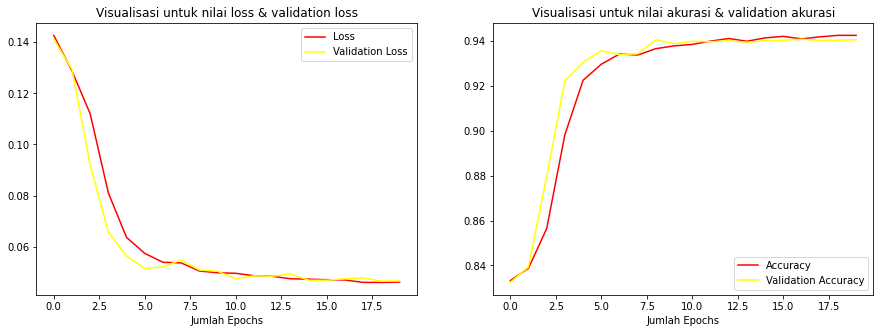

In [ ]:
# Membuat visualisasi dari hasil neural network antara loss, validation loss dan akurasi, validation akurasi
plt.figure(figsize=(15,5))

# Membuat visualisasi untuk nilai loss dan validation loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="red", label="Loss")
plt.plot(history.history['val_loss'], color="yellow", label="Validation Loss")
plt.title("Visualisasi untuk nilai loss & validation loss")
plt.xlabel("Jumlah Epochs")
plt.legend()

# Membuat visualisasi untuk nilai akurasi dan validation akurasi
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color="red", label="Accuracy")
plt.plot(history.history['val_accuracy'], color="yellow", label="Validation Accuracy")
plt.title("Visualisasi untuk nilai akurasi & validation akurasi")
plt.xlabel("Jumlah Epochs")
plt.legend()
plt.show();

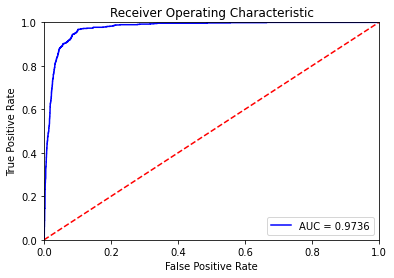

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
fpr.tofile("/content/drive/MyDrive/SKRIPSI/fprcnnAnovaAAC200FIX")
tpr.tofile("/content/drive/MyDrive/SKRIPSI/tprcnnAnovaAAC200FIX")

In [ ]:
roc_auc

0.9735525727069351